In [110]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../../data/kidney_disease.csv')
print(myData.shape)

(400, 26)


In [111]:
myData = myData.drop(columns=['id'])
# myData = myData.drop(columns=['classification'])
peek = myData.head(10)
print(peek)

    age     bp     sg   al   su       rbc        pc         pcc          ba    bgr  ...  pcv  \
0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent  notpresent  121.0  ...   44   
1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent  notpresent    NaN  ...   38   
2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent  423.0  ...   31   
3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent  117.0  ...   32   
4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent  106.0  ...   35   
5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent  notpresent   74.0  ...   39   
6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent  notpresent  100.0  ...   36   
7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent  notpresent  410.0  ...   44   
8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present  notpresent  138.0  ...   33   
9  53.0   90.0  1.020  2.0  0.0  abnorma

In [112]:
shape = myData.shape
print(shape)

(400, 25)


In [113]:
types = myData.dtypes
print(types)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [114]:
outcome_counts = myData.groupby('classification').size()
print(outcome_counts)

classification
ckd       248
ckd\t       2
notckd    150
dtype: int64


In [115]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [116]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                  age     bp     sg     al     su    rbc     pc    pcc     ba    bgr  ...    pcv  \
age             1.000  0.159 -0.191  0.122  0.221  0.122  0.031  0.100 -0.010  0.245  ... -0.166   
bp              0.159  1.000 -0.219  0.161  0.223  0.025 -0.077  0.021  0.052  0.160  ... -0.185   
sg             -0.191 -0.219  1.000 -0.470 -0.296 -0.105  0.259 -0.223 -0.137 -0.375  ...  0.361   
al              0.122  0.161 -0.470  1.000  0.269 -0.222 -0.445  0.299  0.228  0.379  ... -0.375   
su              0.221  0.223 -0.296  0.269  1.000  0.071 -0.085  0.106  0.053  0.718  ... -0.136   
rbc             0.122  0.025 -0.105 -0.222  0.071  1.000  0.431 -0.076 -0.126  0.018  ...  0.124   
pc              0.031 -0.077  0.259 -0.445 -0.085  0.431  1.000 -0.335 -0.172 -0.168  ...  0.233   
pcc             0.100  0.021 -0.223  0.299  0.106 -0.076 -0.335  1.000  0.517  0.143  ... -0.162   
ba             -0.010  0.052 -0.137  0.228  0.053 -0.126 -0.172  0.517  1.000  0.028  ... -0.077   


<AxesSubplot:ylabel='Frequency'>

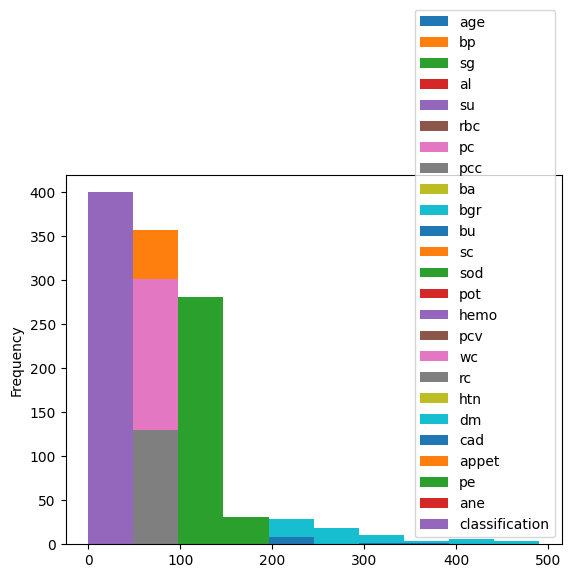

In [117]:
import matplotlib.pyplot as plt
myData.plot.hist()

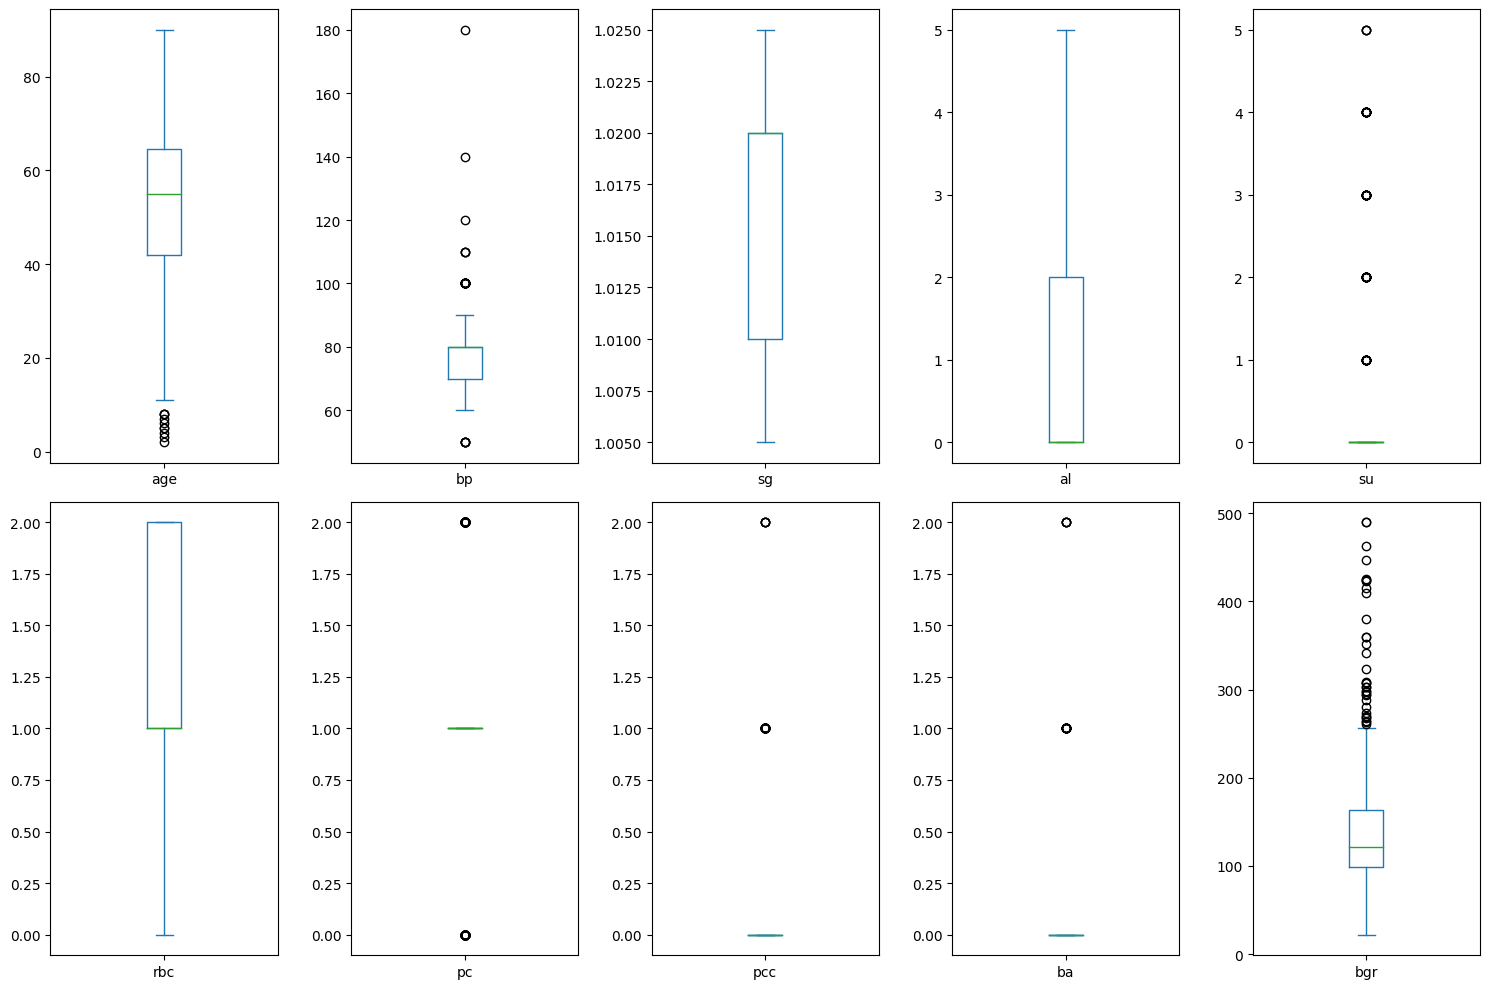

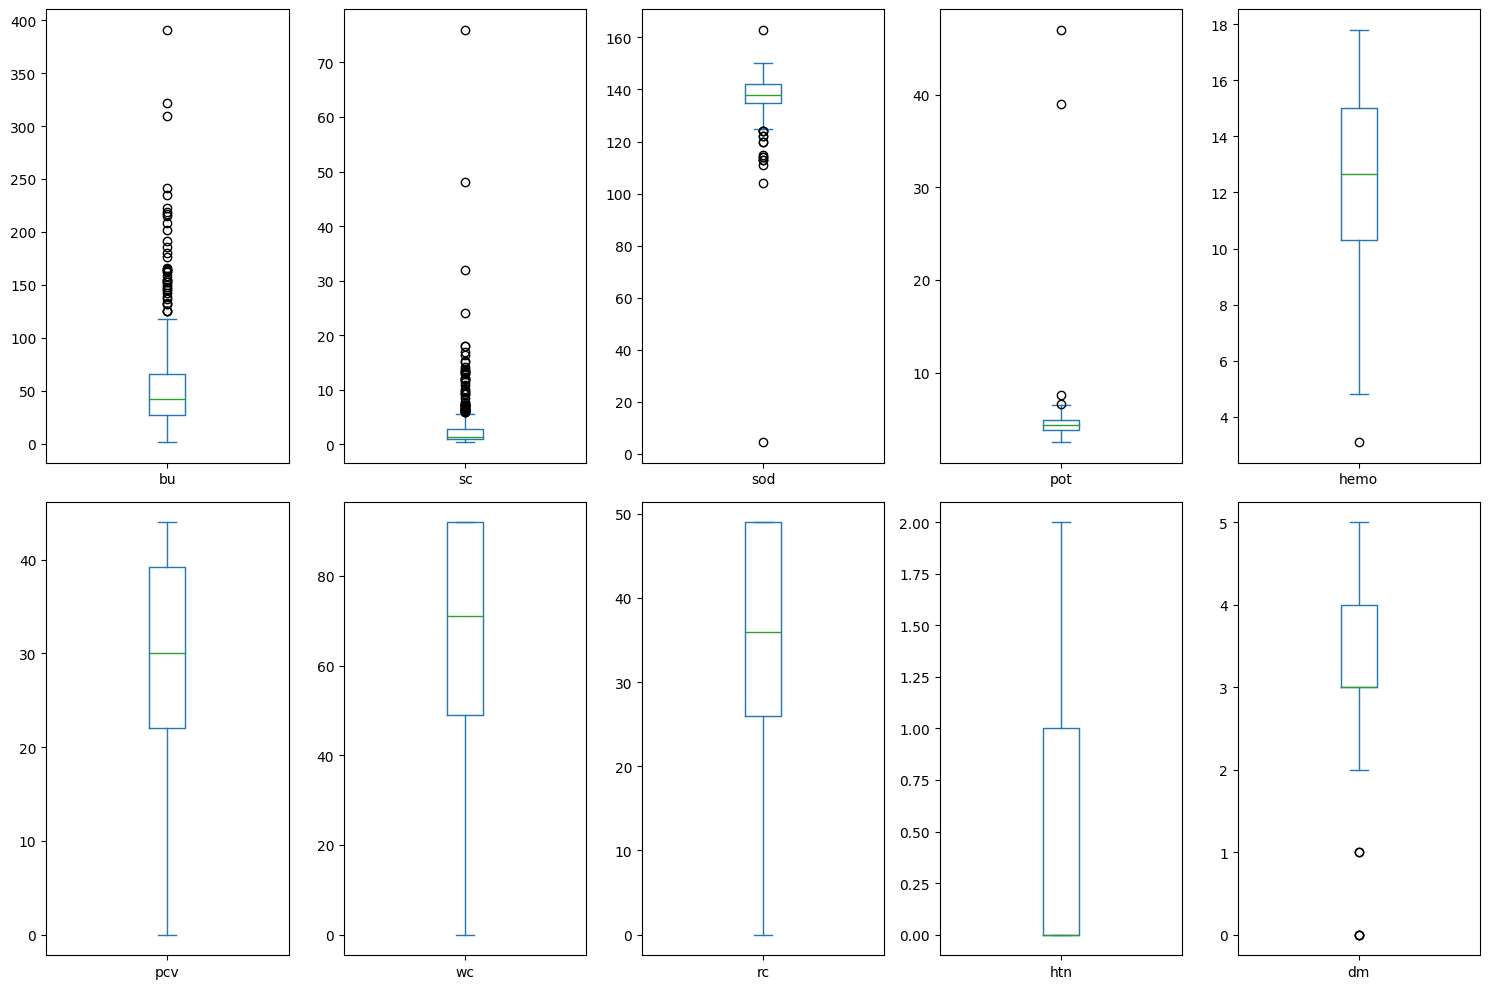

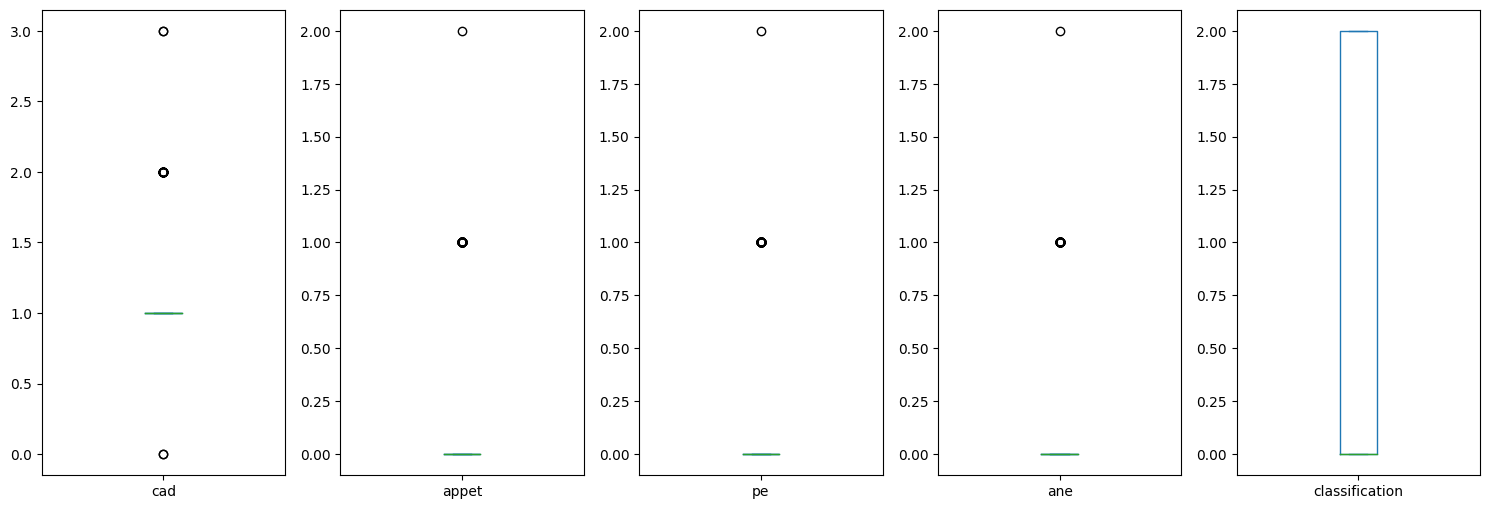

In [118]:
import matplotlib.pyplot as plt
num_columns = len(myData.columns)
cols_per_fig = 10

for i in range(0, num_columns, cols_per_fig):
    myData.iloc[:, i:i+cols_per_fig].plot(
        kind='box', 
        subplots=True, 
        layout=(2, 5),
        figsize=(15, 10),
        sharex=False,
        sharey=False
    )
    plt.tight_layout()
    plt.show()

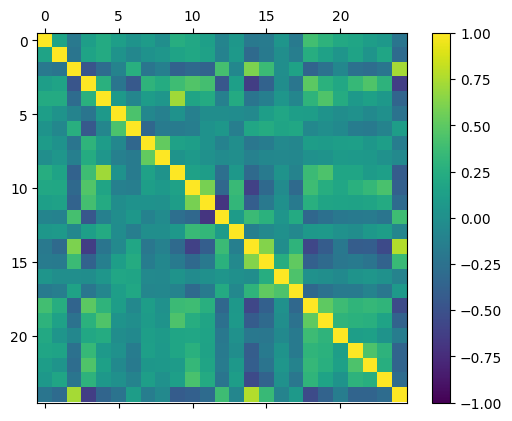

In [119]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [120]:
X = myData.drop('classification', axis=1).values
Y = myData['classification'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.67  0.231 0.5   0.4   0.    0.    0.    0.    0.    0.323 0.376 0.046
  0.823 0.061 0.313 0.273 0.913 0.245 0.5   0.8   0.667 0.5   0.5   0.5  ]
 [0.659 0.308   nan   nan   nan 1.    1.    0.    0.      nan 0.458 1.
  0.      nan 0.531 0.455 0.62  0.327 0.5   0.8   0.667 0.    0.    0.   ]
 [0.523 0.231 1.    0.8   0.    0.5   0.    0.    0.    0.156 0.415 0.097
  0.83  0.029 0.456 0.455 0.696 0.286 0.5   0.6   0.333 0.    0.    0.5  ]
 [0.216 0.154 0.25  0.    0.    1.    0.5   0.    0.      nan   nan   nan
    nan   nan   nan 1.    1.    1.    0.    0.6   0.333 0.5   0.    0.5  ]
 [0.455 0.385 0.5   0.8   0.    0.5   0.    0.    0.5     nan 0.125 0.013
  0.785 0.034 0.544 0.614 0.837 0.551 0.5   0.6   0.333 0.5   0.    0.   ]]


In [121]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('classification', axis=1).values
mydata_label = myData['classification'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.125 0.286 0.004 0.004 0.    0.    0.007 0.    0.    0.282 0.721 0.039
  0.478 0.012 0.028 0.043 0.261 0.039 0.    0.014 0.004 0.    0.    0.   ]
 [0.183 0.271 0.003 0.01  0.    0.    0.    0.    0.    0.7   0.261 0.021
  0.453 0.016 0.033 0.054 0.311 0.166 0.003 0.014 0.003 0.003 0.003 0.   ]
 [0.18  0.266 0.003 0.01  0.    0.007 0.    0.    0.    0.692 0.296 0.02
  0.432 0.016 0.031 0.146 0.306 0.163 0.003 0.013 0.003 0.003 0.003 0.   ]
 [0.218 0.318 0.005 0.    0.    0.009 0.005 0.    0.    0.564 0.109 0.005
  0.645 0.019 0.056 0.114 0.268 0.127 0.    0.018 0.005 0.    0.    0.   ]
 [0.399 0.382 0.005 0.    0.    0.005 0.005 0.    0.    0.382 0.175 0.005
  0.683 0.022 0.055 0.093 0.18  0.082 0.005 0.022 0.005 0.    0.005 0.   ]]


In [122]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


In [123]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('classification', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('classification', axis=1).values
mydata_label = myData['classification'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[ 28.976  34.458 299.005 260.738  52.745   4.006  52.457  17.599   7.319
  70.054  85.887  92.146  89.56    1.523 424.34  222.762   1.54   52.046
 189.544 141.241  13.386  54.382  49.36   29.983]


In [124]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False  True False False  True False False False False False False
 False False False False False False  True False False  True False False]
Feature Ranking: [18 16  1  3 11  1  9  8  5 21 20 17 15 12  7 13 19 14  1  4 10  1  2  6]


In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.654 0.205 0.083]
[[ 6.674e-02  3.354e-02 -3.305e-05  8.859e-03  9.658e-03 -3.763e-04
  -1.944e-03  9.335e-04  4.560e-04  9.729e-01  2.063e-01  1.191e-02
  -3.015e-02  3.414e-03 -1.556e-02 -4.368e-02 -9.711e-04 -4.366e-02
   3.291e-03  3.456e-03  1.458e-03  1.437e-03  1.173e-03  7.410e-04]
 [ 2.882e-02  5.838e-02 -4.471e-05  1.458e-02 -1.585e-03 -2.938e-03
  -3.616e-03  1.396e-03  5.971e-04 -2.192e-01  9.542e-01  5.313e-02
  -5.707e-02  1.345e-02 -3.642e-02 -8.464e-02 -7.580e-02 -1.285e-01
   3.216e-03  2.333e-03  5.076e-04  2.746e-03  3.544e-03  3.873e-03]
 [ 5.365e-02  1.556e-04 -1.862e-05  1.991e-03 -2.962e-04 -1.559e-03
  -1.328e-03  4.431e-04  8.322e-04  8.663e-03 -9.824e-02 -1.010e-02
  -8.251e-03  1.760e-03 -2.813e-03 -3.560e-02 -9.848e-01 -1.270e-01
  -4.100e-04 -2.291e-04  7.022e-04 -6.837e-04 -6.259e-04 -8.222e-04]]


In [126]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(228, 3)


In [127]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(228, 6)


In [128]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier


myData['num'] = pd.cut(myData['classification'], bins=3, labels=[0, 1, 2])
mydata_label = myData['classification'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.004 0.008 0.131 0.14  0.023 0.095 0.031 0.01  0.002 0.026 0.028 0.026
 0.016 0.006 0.104 0.056 0.002 0.039 0.11  0.085 0.005 0.03  0.013 0.009]
